(570, 29)
(570,)


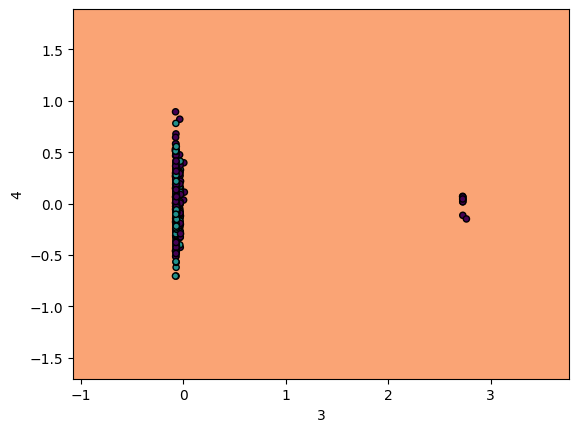

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the dataset
brest_cancer = pd.read_csv('breast-cancer.csv', sep=',', header=None)

# Extract features and target variable
X = brest_cancer.iloc[:, 3:33]
Y = brest_cancer.iloc[:, 1]

print(X.shape)
print(Y.shape)
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = onehot_encoder.fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_encoded)

# Split the reduced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y_encoded, test_size=0.2, random_state=100)

# Train the SVM model on the reduced data
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X_train,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=brest_cancer.columns[3],
        ylabel=brest_cancer.columns[4],
    )

# Scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train, 
            s=20, edgecolors="k")
plt.show()